In [1]:
from keras.datasets import fashion_mnist
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import time
import itertools 

Using TensorFlow backend.


# 1.Import Dataset

In [2]:
#import the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


# 2.Data Preprocessing

## 2.1StandardScaler

In [0]:
#StandardScaler
def data_flatten(X_dataset):
  X_num, nx, ny = X_dataset.shape
  X_dataset = X_dataset.astype('float64').reshape((X_num,nx*ny))
  return X_dataset
def std_scaler(X_dataset):
    std_scaler = preprocessing.StandardScaler()
    std_scaler.fit(X_dataset)
    return std_scaler
X_train = data_flatten(X_train)
X_test = data_flatten(X_test)
scaler = std_scaler(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2.2PCA

In [0]:
#PCA   
pca = PCA(n_components=256)#set the dimension which contains 95% information
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
X_test = pca.transform(X_test)

# 3.Tuning Parameter

## 3.1 Tuning Parameter C

In [0]:
grid = GridSearchCV(SVC(kernel='rbf',gamma='auto'), param_grid={'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]},cv=2)
grid.fit(X_train[:20000], y_train[:20000])
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
for i in range(len(grid.cv_results_['params'])):
  print(str(grid.cv_results_['params'][i])+" acc:"+str(grid.cv_results_['mean_test_score'][i])+" time:"+str(grid.cv_results_['mean_score_time'][i]))

The best parameters are {'C': 10} with a score of 0.86
{'C': 0.001} acc:0.1034 time:37.86243450641632
{'C': 0.01} acc:0.62045 time:38.18564057350159
{'C': 0.1} acc:0.7682 time:26.525902152061462
{'C': 1} acc:0.8553 time:20.970561146736145
{'C': 10} acc:0.85965 time:22.408360242843628
{'C': 100} acc:0.85895 time:22.475104331970215


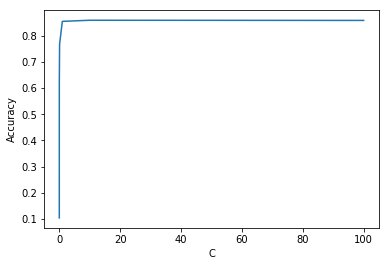

In [0]:
x = [item['C'] for item in grid.cv_results_['params']]
y = grid.cv_results_['mean_test_score']
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(x,y)

## 3.2Tuning parameter C and Sigmma

In [0]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid={'C': [1, 10, 100],'gamma': [1e-3, 1e-2, 0.1, 1]}, cv=2)
grid.fit(X_train[:20000], y_train[:20000])
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))
for i in range(len(grid.cv_results_['params'])):
  print(str(grid.cv_results_['params'][i])+" acc:"+str(grid.cv_results_['mean_test_score'][i]))

The best parameters are {'C': 10, 'gamma': 0.001} with a score of 0.87
{'C': 1, 'gamma': 0.001} acc:0.8586
{'C': 1, 'gamma': 0.01} acc:0.77075
{'C': 1, 'gamma': 0.1} acc:0.1556
{'C': 1, 'gamma': 1} acc:0.1035
{'C': 10, 'gamma': 0.001} acc:0.8729
{'C': 10, 'gamma': 0.01} acc:0.78225
{'C': 10, 'gamma': 0.1} acc:0.1705
{'C': 10, 'gamma': 1} acc:0.1035
{'C': 100, 'gamma': 0.001} acc:0.86465
{'C': 100, 'gamma': 0.01} acc:0.78225
{'C': 100, 'gamma': 0.1} acc:0.1705
{'C': 100, 'gamma': 1} acc:0.1035


In [0]:
res ={}
for i in range(len(grid.cv_results_['params'])):
  if grid.cv_results_['params'][i]['gamma'] not in res:
    res[grid.cv_results_['params'][i]['gamma']] = [[grid.cv_results_['params'][i]['C']],[grid.cv_results_['mean_test_score'][i]]]
  res[grid.cv_results_['params'][i]['gamma']][0].append(grid.cv_results_['params'][i]['C'])
  res[grid.cv_results_['params'][i]['gamma']][1].append(grid.cv_results_['mean_test_score'][i])
  
    

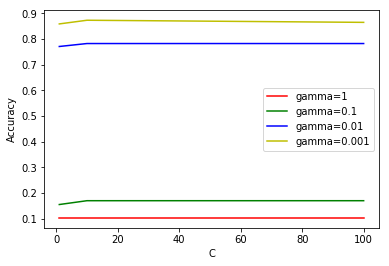

In [0]:

plt.plot(res[1][0],res[1][1],label='gamma=1',color = 'r')
plt.plot(res[0.1][0],res[0.1][1],label='gamma=0.1',color='g')
plt.plot(res[0.01][0],res[0.01][1],label='gamma=0.01',color='b')
plt.plot(res[0.001][0],res[0.001][1],label='gamma=0.001',color='y')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()

## 3.3 10-fold Cross Validation

In [0]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid={'C': [10],'gamma': [1e-3]}, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [10], 'gamma': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
grid.cv_results_

{'mean_fit_time': array([206.94776843]),
 'mean_score_time': array([41.90439603]),
 'mean_test_score': array([0.90418333]),
 'param_C': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.001],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10, 'gamma': 0.001}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.90216667]),
 'split1_test_score': array([0.90966667]),
 'split2_test_score': array([0.89666667]),
 'split3_test_score': array([0.90633333]),
 'split4_test_score': array([0.90816667]),
 'split5_test_score': array([0.90383333]),
 'split6_test_score': array([0.90666667]),
 'split7_test_score': array([0.90666667]),
 'split8_test_score': array([0.90666667]),
 'split9_test_score': array([0.895]),
 'std_fit_time': array([1.18072948]),
 'std_score_time': array([0.69085833]),
 'std_test_score': array([0.00462688])}

# 4.Trained Model

## 4.1Prediction

In [0]:
start = time.time()
svclassifier = SVC(kernel='rbf',C=10,gamma=0.001)
svclassifier.fit(X_train, y_train)
end = time.time()
print("the time for training model is {} seconds.".format(str(end-start)))

the time for training model is 220.57718515396118 seconds.


In [0]:
start = time.time()
y_pred = svclassifier.predict(X_test)
end = time.time()
print("the time for predicting label is {} seconds.".format(str(end-start)))

the time for predicting label is 74.58197236061096 seconds.


## 4.2 Evaluation

In [0]:
#get confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap='Oranges'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  f = plt.figure()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  

<Figure size 432x288 with 0 Axes>

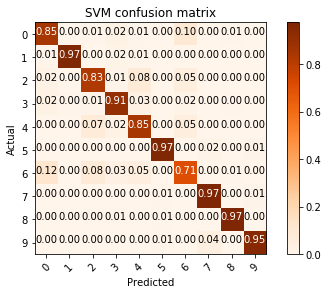

In [0]:
classes = [i for i in range(10)]
cfz_mat = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cfz_mat, classes=classes, normalize=True,
                      title='SVM confusion matrix')
plt.show()

In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[851   0  11  23   5   1  99   0  10   0]
 [  5 970   1  17   5   0   2   0   0   0]
 [ 22   1 827  12  81   0  54   0   3   0]
 [ 23   4  12 908  31   0  18   0   4   0]
 [  0   0  73  23 848   0  54   0   2   0]
 [  0   0   0   1   0 968   0  18   1  12]
 [115   1  83  32  50   1 707   0  11   0]
 [  0   0   0   0   0  11   0 975   0  14]
 [  3   0   4   6   2   5   2   3 975   0]
 [  0   0   0   0   0   8   0  39   2 951]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.83      0.82      1000
           3       0.89      0.91      0.90      1000
           4       0.83      0.85      0.84      1000
           5       0.97      0.97      0.97      1000
           6       0.76      0.71      0.73      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97     